<a href="https://colab.research.google.com/github/hemekci/ABTest/blob/main/Copy_of_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Test 
# Comparing Average Bids vs. Maximum Bids in Facebook

`***When an advertiser is creating a campaign using the App Install or Conversion objective, they have the option to set a Maximum bid or an Average bid. Maximum bidding is just as it sounds – Facebook will optimize your campaign to deliver as many results as possible, with costs that are equal to or less than your desired maximum bid. Average bidding, on the other hand, will optimize your campaign to deliver results with costs that average to the amount you place in the UI***`

Variables
* Impression – Number of appearing
* Click – Number of Click
* Purchase – Total Purchase
* Earning – Total Earning

Business Target for this case
* Purchase
-----------------------------------

Why A/B test? we need to make sure those groups are statistically whether different/or not. For example means are different why we are testing. Beacuse we are working with samples.

-------------------------------------
* t-test number of observation is low
* z-test number of observation is high
-------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 10)



## Descriptive Statistics

In [ ]:
df_control = pd.read_excel("/content/drive/MyDrive/ColabData/scoring_ratings/ab_testing.xlsx", sheet_name="Control Group")
print(df_control.head())
df_test = pd.read_excel("/content/drive/MyDrive/ColabData/scoring_ratings/ab_testing.xlsx", sheet_name="Test Group")
print(df_test.head())


   Impression   Click  Purchase  Earning
0    82529.46 6090.08    665.21  2311.28
1    98050.45 3382.86    315.08  1742.81
2    82696.02 4167.97    458.08  1797.83
3   109914.40 4910.88    487.09  1696.23
4   108457.76 5987.66    441.03  1543.72
   Impression   Click  Purchase  Earning
0   120103.50 3216.55    702.16  1939.61
1   134775.94 3635.08    834.05  2929.41
2   107806.62 3057.14    422.93  2526.24
3   116445.28 4650.47    429.03  2281.43
4   145082.52 5201.39    749.86  2781.70


In [ ]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00,101711.45,20302.16,45475.94,85726.69,99790.70,115212.82,147539.34
Click,40.00,5100.66,1329.99,2189.75,4124.30,5001.22,5923.80,7959.13
Purchase,40.00,550.89,134.11,267.03,470.10,531.21,637.96,801.80
Earning,40.00,1908.57,302.92,1253.99,1685.85,1975.16,2119.80,2497.30


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00,120512.41,18807.45,79033.83,112691.97,119291.30,132050.58,158605.92
Click,40.00,3967.55,923.10,1836.63,3376.82,3931.36,4660.50,6019.70
Purchase,40.00,582.11,161.15,311.63,444.63,551.36,699.86,889.91
Earning,40.00,2514.89,282.73,1939.61,2280.54,2544.67,2761.55,3171.49


In [ ]:
print(sms.DescrStatsW(df_control["Purchase"]).tconfint_mean())
print(sms.DescrStatsW(df_test["Purchase"]).tconfint_mean())
#two-sided confidence interval for weighted mean of data 1-alpha=0.05
#their confidence interval intersects

(508.0041754264924, 593.7839421139709)
(530.5670226990062, 633.6451705979289)


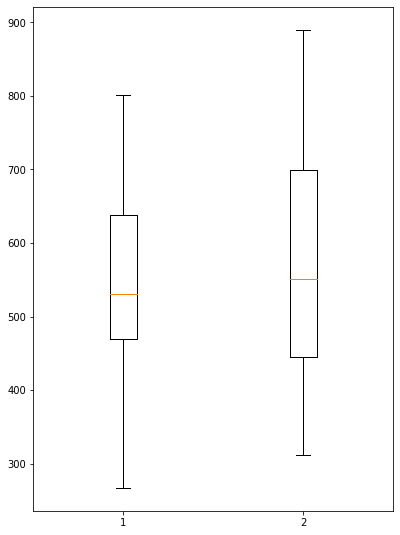

In [ ]:
data = [df_control['Purchase'], df_test['Purchase']]
fig = plt.figure(figsize =(5, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()


#Parametric and Non-parametric tests
* parametric tests compare  means  and addition substraction eligible. It should be normal distrubition and continues data. homogeneous variance.
  * 1 sample- test mean of sample = population
  * 2 samples - test two mean of samples - z-test
  * more than 2 samples ANOVA test - more than two samples


* non-parametric tests compare medians, not eligible addition. for example categoric variables. contradicts with normality discrete data.non-homogeneous variance. 
  * 1 sample test
  * 2 samples test
  * more than 2 samples
---------------------------------------
Table: [Parametric and Non-parametric tests for comparing two or more groups](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)

 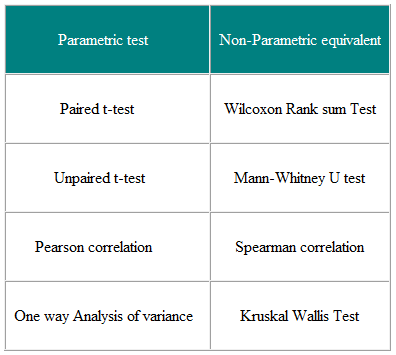


## Hypothesis Test
### H0: Equality
### H1: 


In [ ]:
# NORMALITY CONTROL shapiro
# H0: df_control['Purchase'] = normal data???
test_stat_c, pvalue_c = shapiro(df_control['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat_c, pvalue_c))
#H0 fail to reject because p>0.05

# H0: df_test['Purchase'] = normal data???
test_stat_t, pvalue_t = shapiro(df_test['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat_t, pvalue_t))
# #H0 fail to reject because p>0.15

Test Stat = 0.9773, p-value = 0.5891
Test Stat = 0.9589, p-value = 0.1541


In [ ]:
# VARIANCE CONTROL levene
# H0: variance is Homogeneous
test_stat, pvalue = levene(df_test["Purchase"],df_control["Purchase"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))  


Test Stat = 2.6393, p-value = 0.1083


In [ ]:
#parametric because assumpstions are hold.
#compare mean's
#AB 2 sample - t
# HO: Test there is no difference between groups
import scipy.stats as stats

test_stat, pvalue_2sT = stats.ttest_ind(df_control['Purchase'],df_test['Purchase'],equal_var=True)
#print('test_stat = %.4f, pvalue_2sT = %.4f' % (test_stat, pvalue_2sT))
# H0 fail to reject (p = 0.3493 > 0.05

print ("ttest statistics: {}\np_value: {}".format (test_stat, pvalue_2sT))

ttest statistics: -0.9415584300312964
p_value: 0.34932579202108416


## DO IT SAME FOR ALL

In [ ]:
def normality_func(dataframe):
    from scipy.stats import shapiro
    p_value_threshold = 0.05
    p_value_list = []
    distribution_list = []
    normal_list = []
    abnormal_list = []
    for col in dataframe.columns:
        ttest, p_value = shapiro (dataframe[col])
        p_value_list.append (p_value)
        if p_value >= p_value_threshold:
            distribution_list.append ("Normal")
            normal_list.append (col)
        else:
            distribution_list.append ("Abnormal")
            abnormal_list.append (col)

    new_df = pd.DataFrame (index=dataframe.columns, data={"P_Value": p_value_list, "Distribution": distribution_list})
    return new_df, normal_list, abnormal_list


In [ ]:
def variance_homogeneity(dataframe_control, dataframe_test):
    from scipy.stats import levene
    p_value_threshold = 0.05
    p_value_list = []
    variance_list = []
    column_list = list(zip(sorted(dataframe_control.columns), sorted(dataframe_test.columns)))
    features = []
    homogeneus_list = []
    not_homogeneus_list = []
    for col in column_list:
        ttest_lev, p_value_lev = levene(dataframe_control[col[0]], dataframe_test[col[1]])
        if (col[0] == col[1]) and (p_value_lev >= p_value_threshold):
            p_value_list.append(p_value_lev)
            variance_list.append("No Difference")
            homogeneus_list.append(col[0])
            features.append(col[0])
        elif (col[0] == col[1]) and (p_value_lev < p_value_threshold):
            p_value_list.append(p_value_lev)
            variance_list.append("Different")
            not_homogeneus_list.append(col[0])
            features.append(col[0])

    new_df = pd.DataFrame(index=features, data={"P_Value": p_value_list, "Homogeneity_of_Variance": variance_list})

    return new_df, homogeneus_list, not_homogeneus_list


In [ ]:
control_normality, control_normal_list, control_abnormal_list = normality_func(df_control)
print(control_normality)
test_normality, test_normal_list, test_abnormal_list = normality_func(df_test)
print(test_normality)


            P_Value Distribution
Impression     0.35       Normal
Click          0.85       Normal
Purchase       0.59       Normal
Earning        0.53       Normal
            P_Value Distribution
Impression     0.41       Normal
Click          0.97       Normal
Purchase       0.15       Normal
Earning        0.62       Normal


In [ ]:
ttest_lev, p_value_lev = levene(df_control["Purchase"], df_test["Purchase"])
print("ttest istatistiği: {}\np_value: {}".format(ttest_lev, p_value_lev))
variance_df, homogeneus, not_homogeneus = variance_homogeneity(df_control, df_test)


ttest istatistiği: 2.6392694728747363
p_value: 0.10828588271874791


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
# Normal dağılan parametrik değişkenler için ttest, normal dağılmayan nonparametrik değişkenler için mannwhitneyu testini kullanıyoruz.
feat_dict = {}
for feat in control_normal_list:
    if feat in homogeneus:
        ttest_value, p_value = ttest_ind(df_control[feat], df_test[feat], equal_var=True)
        feat_dict[feat] = p_value
    elif feat not in homogeneus:
        ttest_value, p_value = ttest_ind(df_control[feat], df_test[feat], equal_var=False)
        feat_dict[feat] = p_value

for feat in control_abnormal_list:
    ttest_value, p_value = mannwhitneyu(df_control[feat], df_test[feat])
    feat_dict[feat] = p_value

ttest_df = pd.DataFrame(data=feat_dict.values(), index=feat_dict.keys(), columns=["Ttest_P_Value"])
print(ttest_df)


            Ttest_P_Value
Impression           0.00
Click                0.00
Purchase             0.35
Earning              0.00


In [ ]:
# Maximum ve Average Bidding ortalamalarını karşılaştırmak için dataframe'e ekliyoruz.
for col in df_control.columns:
    ttest_df.loc[ttest_df.index == col, "Maximum Bidding Mean"] = df_control[col].mean()

for col in df_test.columns:
    ttest_df.loc[ttest_df.index == col, "Average Bidding Mean"] = df_test[col].mean()

threshold = 0.05  # p_value değeri
ttest_df.loc[ttest_df["Ttest_P_Value"] < threshold, "H0_Hypothesis"] = "Rejected"
ttest_df.loc[ttest_df["Ttest_P_Value"] >= threshold, "H0_Hypothesis"] = "Not Rejected"

# Her bir değişken için iki bidding tipinin ortalamalarını karşılaştırıyoruz.
ttest_df["Winner"] = ttest_df.apply(
    lambda x: "Maximum Bidding" if (x["Maximum Bidding Mean"] >= x["Average Bidding Mean"]) & (
            x["H0_Hypothesis"] == "Rejected") else
    "Average Bidding" if (x["Maximum Bidding Mean"] < x["Average Bidding Mean"]) & (
            x["H0_Hypothesis"] == "Rejected") else
    "No Difference", axis=1)

ttest_df


,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean,H0_Hypothesis,Winner
Impression,0.00,101711.45,120512.41,Rejected,Average Bidding
Click,0.00,5100.66,3967.55,Rejected,Maximum Bidding
Purchase,0.35,550.89,582.11,Not Rejected,No Difference
Earning,0.00,1908.57,2514.89,Rejected,Average Bidding


# RATIO TEST

In [ ]:
# İKİ ÖRNEKLEM ORAN TESTİ
# H0 : Kontrol grubu dönüşüm oranı ile test grubu dönüşüm oranı arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1 : Kontrol grubu dönüşüm oranı ile test grubu dönüşüm oranı arasında istatistiksel olarak anlamlı bir fark vardır.
# p_value < 0.05 ise H0 reddedilir.

df_control["Purchase"].shape[0]  # Gözlem sayısı 40, n1>30 varsayımı sağlanıyor.
df_test["Purchase"].shape[0]  # Gözlem sayısı 40, n2>30 varsayımı sağlanıyor.

from statsmodels.stats.proportion import proportions_ztest

threshold = 0.05  # p_value değeri


purchase_sum = np.array([df_control["Purchase"].sum(), df_test["Purchase"].sum()])
click_sum = np.array([df_control["Click"].sum(), df_test["Click"].sum()])
impression_sum = np.array([df_control["Impression"].sum(), df_test["Impression"].sum()])

# purchase / impression
ttest_z_purc_imp, p_purc_imp = proportions_ztest(purchase_sum, impression_sum)

# purchase / click
ttest_z_purc_click, p_purc_click = proportions_ztest(purchase_sum, click_sum)

# click / impression
ttest_z_click_imp, p_click_imp = proportions_ztest(click_sum, impression_sum)

prop_df = pd.DataFrame(index=["Purchase/Impression", "Purchase/Click", "Click/Impression"],
                       columns=["Proportions_P_Value"], data=[p_purc_imp, p_purc_click, p_click_imp])

prop_df.loc[prop_df.index == "Purchase/Impression", "Maximum Bidding"] = df_control["Purchase"].sum() / df_control["Impression"].sum()
prop_df.loc[prop_df.index == "Purchase/Impression", "Average Bidding"] = df_test["Purchase"].sum() / df_test["Impression"].sum()

prop_df.loc[prop_df.index == "Purchase/Click", "Maximum Bidding"] = df_control["Purchase"].sum() / df_control["Click"].sum()
prop_df.loc[prop_df.index == "Purchase/Click", "Average Bidding"] = df_test["Purchase"].sum() / df_test["Click"].sum()

prop_df.loc[prop_df.index == "Click/Impression", "Maximum Bidding"] = df_control["Click"].sum() / df_control["Impression"].sum()
prop_df.loc[prop_df.index == "Click/Impression", "Average Bidding"] = df_test["Click"].sum() / df_test["Impression"].sum()

prop_df["H0_Hypothesis"] = prop_df.apply(
    lambda x: "Rejected" if x["Proportions_P_Value"] < threshold else "Not Rejected", axis=1)

prop_df["Winner"] = prop_df.apply(
    lambda x: "Maximum Bidding" if x["Maximum Bidding"] >= x["Average Bidding"] else "Average Bidding", axis=1)

prop_df

,Proportions_P_Value,Maximum Bidding,Average Bidding,H0_Hypothesis,Winner
Purchase/Impression,0.00,0.01,0.00,Rejected,Maximum Bidding
Purchase/Click,0.00,0.11,0.15,Rejected,Average Bidding
Click/Impression,0.00,0.05,0.03,Rejected,Maximum Bidding
